MODUL VI

PENDETEKSIAN TEPI

In [124]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

fungsi diatas merupakan fungsi untuk memanggil library yang sudah ada dalam python,
cv2 library python yang berfungsi untuk membaca, menampilkan, dan menyimpan gambar,
matplotlib library python yang berfungsi untuk memvisualisasikan data,
numpy library python yang berfungsi untuk melakukan operasi vektor dan matriks dengan mengolah array multidimensi.

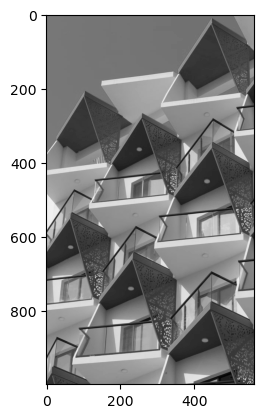

In [125]:
img = plt.imread("Modul6.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')


pada fungsi diatas merupakan fungsi untuk memanggil atau mengimport gambar dengan fungsi plt kemudian mengubah atau konversi warna gambar yang awalnya RGB menjadi GRAY dengan fungsi yang sudah disediakan oleh library cv2, kemudian menampilkan gambar tersebut dengan fungsi yang sudah disediakan oleh library matplotlib.

In [126]:
def konvolusi(picture, kernel):
    result = np.zeros(picture.shape, dtype = int)
    heightR, weightR = picture.shape
    heightK, weightK = kernel.shape
    h_tmp, w_tmp = int ((heightK-1)/2),  int ((weightK-1)/2)
 
    padd = np.pad(picture, ( (h_tmp, heightK-h_tmp),(w_tmp, weightK-w_tmp)), "constant" )
    for i in range (heightR):
        for j in range (weightR):
            for k in range (heightK):
                for l in range (weightK):
                    result[i,j] += padd[i+k,j+l] * kernel[k,l]
                
    return result

pada code diatas merupakan fungsi untuk melakukan konvolusi pada setiap piksel pada citra dengan kernel yang telah ditentukan. dengan membuat sebuah array kosong untuk menampung hasil dari konvolusi tersebut, kemudian melakukan padding pada citra guna membatasi ukuran dan size pada citra kemudian melakukan perhitungan konvolusi setiap piksel pada citra dengan kernel yang telah ditentukan. kemudian menyimpan hasil konvolusi pada array kosong yang telah dibuat sebelumnya.

METODE SOBEL

In [127]:
Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Sy = np.array([[-1, -2, -1], [ 0,  0,  0], [1, 2, 1]])

code diatas merupakan inisialisasi dari kernel sobel dengan rx dan ry sesuai dengan kernel sobel tersebut.

In [128]:
def sobel(image):
    gx = konvolusi(image, Sx)
    gy = konvolusi(image, Sy)
    result = np.zeros(image.shape)
    gx = np.abs(gx)
    gy = np.abs(gy)
    
    result = np.sqrt(gx**2 + gy**2)
    
    return result

pada code diatas merupakan fungsi untuk melakukan operasi sobel. langkah pertama yang dilakukan adalah melakukan konvolusi pada gx, dan gy dengan kernel sobel itu sendiri. kemudian melakukan absolute pada hasil operasi konvolusi tersebut, kemudian pada tahap akhir adalah melakukan operasi terakhir dengan menjumlahkan gx dan gy.

METODE PRIWETT

In [129]:
Px = np.array([[-1, 0 ,1], [-1, 0 ,1], [-1, 0 ,1]])
Py = np.array([[-1,-1,-1], [0, 0 ,0],[1, 1, 1]])

code diatas merupakan inisialisasi dari kernel prewitt dengan rx dan ry sesuai dengan kernel prewitt tersebut.

In [130]:
def prewitt(image):
    gx = konvolusi(image, Px)
    gy = konvolusi(image, Py)
    result = np.zeros(image.shape)
    gx = np.abs(gx)
    gy = np.abs(gy)
    
    result = np.sqrt(gx**2 + gy**2)
    
    return result

pada code diatas merupakan fungsi untuk melakukan operasi prewitt. langkah pertama yang dilakukan adalah melakukan konvolusi pada gx, dan gy dengan kernel prewitt itu sendiri. kemudian melakukan absolute pada hasil operasi konvolusi tersebut, kemudian pada tahap akhir adalah melakukan operasi terakhir dengan menjumlahkan gx dan gy.

METODE ROBERT

In [131]:
Rx = np.array([[1,0],
               [0,-1]])
Ry = np.array([[0,1],
               [-1,0]])

code diatas merupakan inisialisasi dari kernel robert dengan rx dan ry sesuai dengan kernel robert tersebut.

In [132]:
def robert(image):
    gx = konvolusi(image, Rx)
    gy = konvolusi(image, Ry)    
    result = np.zeros(image.shape)
    gx = np.abs(gx)
    gy = np.abs(gy)
    
    result = np.sqrt(gx**2 + gy**2)
    
    return result

pada code diatas merupakan fungsi untuk melakukan operasi robert. langkah pertama yang dilakukan adalah melakukan konvolusi pada gx, dan gy dengan kernel robert itu sendiri. kemudian melakukan absolute pada hasil operasi konvolusi tersebut, kemudian pada tahap akhir adalah melakukan operasi terakhir dengan menjumlahkan gx dan gy.

In [133]:
a = sobel(gray)
b = prewitt(gray)
c = robert(gray)

pada code diatas berfungsi untuk melakukan pemanggilan fungsi dari ketiga fungsi yaitu sobel, prewitt, dan juga robert dengan menggunakan variabel a, b, c dan dengan parameter gambarnya yang telah dibuat menjadi gray.

(<AxesSubplot:title={'center':'OPERASI ROBERT'}>,
 Text(0.5, 1.0, 'OPERASI ROBERT'),
 <matplotlib.image.AxesImage at 0x247e31c4af0>)

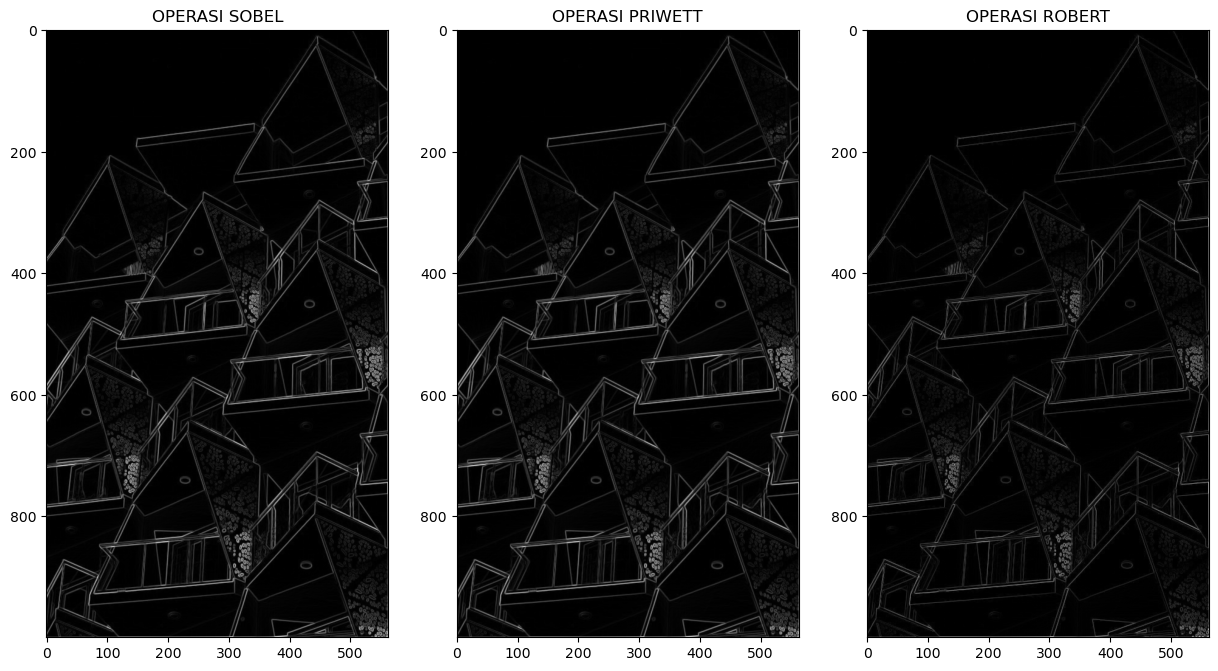

In [134]:
plt.figure(facecolor='white', figsize=[15, 15])
plt.subplot(131), plt.title('OPERASI SOBEL'), plt.imshow(a, 'gray')
plt.subplot(132), plt.title('OPERASI PRIWETT'), plt.imshow(b, 'gray')
plt.subplot(133) ,plt.title('OPERASI ROBERT'), plt.imshow(c, 'gray')

pada code diatas merupakan hasil dari ketiga operator sobel, prewitt, dan robert. dapat diketahui bahwa terdapat beberapa perbedaan mendasar hsil dari ketiga operator tersebut. yang dimana operator sobel akan terlihat lebih bagus hasilnya dikarenakan menggunakan kernel yang 3x3 yang lebih kompleks dari prewitt

2. Buatlah method untuk mencari hasil terbaik dari ketiga metode no 1 dengan cara melihat jumlah warna yang diperoleh dari hasil deteksi tepi(Dapat menggunakan if-else statement)

In [135]:
def perbandingan(image):
    sum = 0

    for i in range (image.shape[0]):
        for j in range (image.shape[1]):
            if image[i, j] != 0:
                sum += 1

    return sum

pada code diatas merupakan fungsi untuk melakukan perbandingan dengan membandingkan fungsi satu dengan yang lainnya dengan cara membuat fungsi tersebut.

In [138]:
s = perbandingan(a)
p = perbandingan(b)
r = perbandingan(c)

pada code diatas digunakan untuk memanggil fungsi perbandingan yang berfungsi untuk membandingkan ketiga operator sobel, prewitt, dan robert. 

In [139]:
if s>p and s>r:
    print("Operator Sobel ")
elif p>s and p>r:
    print("Operator Prewitt ")
elif r>s and r>p:
    print("Operator Robert ")

Operator Prewitt 


pada code diatas merupakan code untuk melakukan perbandingan dalam mencari operasi yang bagus dari ketiga operasi tersebut. yaitu robert, prewitt, dan sobel dengan menggunakan fungsi if. jika sobel lebih bagus dari prewitt dan robert maka akan memunculkan pesan Operator Sobel, jika prewitt lebih bagus dari sobel dari robert maka akan memunculkan pesan Operator Prewitt, dan jika Robert lebih bagus dari keduanya maka akan menampilkan Operator Robert.